### GRIN2A is male permutation eGene (with one nominal eQTL)

In [1]:
library(data.table)
library(tidyverse)

Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘hms’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



In [2]:
male <- fread("~/project-gandalm/isoform_twas/eqtl_new/data/genes.m.bed.gz", data.table = F)

In [3]:
female <- fread("~/project-gandalm/isoform_twas/eqtl_new/data/genes.f.bed.gz", data.table = F)

In [5]:
male.grin2a <- male %>% filter(ID == "ENSG00000183454")
female.grin2a <- female %>% filter(ID == "ENSG00000183454")

In [19]:
dose <- read.table("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/rs9926049_dose.tsv",
                  header = T, check.names = F)

In [22]:
male.grin2a <- male.grin2a[,5:ncol(male.grin2a)]
female.grin2a <- female.grin2a[,5:ncol(female.grin2a)]

In [23]:
dose <- dose[,5:ncol(dose)]

In [26]:
male.dose <- dose[,colnames(dose)%in%colnames(male.grin2a)]
female.dose <- dose[,colnames(dose)%in%colnames(female.grin2a)]

In [34]:
male.grin2a.dose <- rbind(male.grin2a, male.dose[names(male.grin2a)])
female.grin2a.dose <- rbind(female.grin2a, female.dose[names(female.grin2a)])

In [44]:
df <- data.frame("GRIN2A expr" = c(as.numeric(male.grin2a.dose[1,]),
                                   as.numeric(female.grin2a.dose[1,])),
                "Sex" = c(rep("Male", 332), rep("Female", 297)),
                "rs9926049" = c(as.numeric(male.grin2a.dose[2,]),
                                   as.numeric(female.grin2a.dose[2,])))

In [45]:
head(df)

,GRIN2A.expr,Sex,rs9926049
,<dbl>,<chr>,<dbl>
1,8.997484,Male,0
2,9.353833,Male,1
3,8.980693,Male,0
4,9.071987,Male,2
5,10.555633,Male,1
6,9.293343,Male,2


In [46]:
table(df$Sex, df$rs9926049)

        
           0   1   2
  Female 149 116  32
  Male   144 142  46

In [47]:
df$rs9926049 <- as.factor(df$rs9926049)

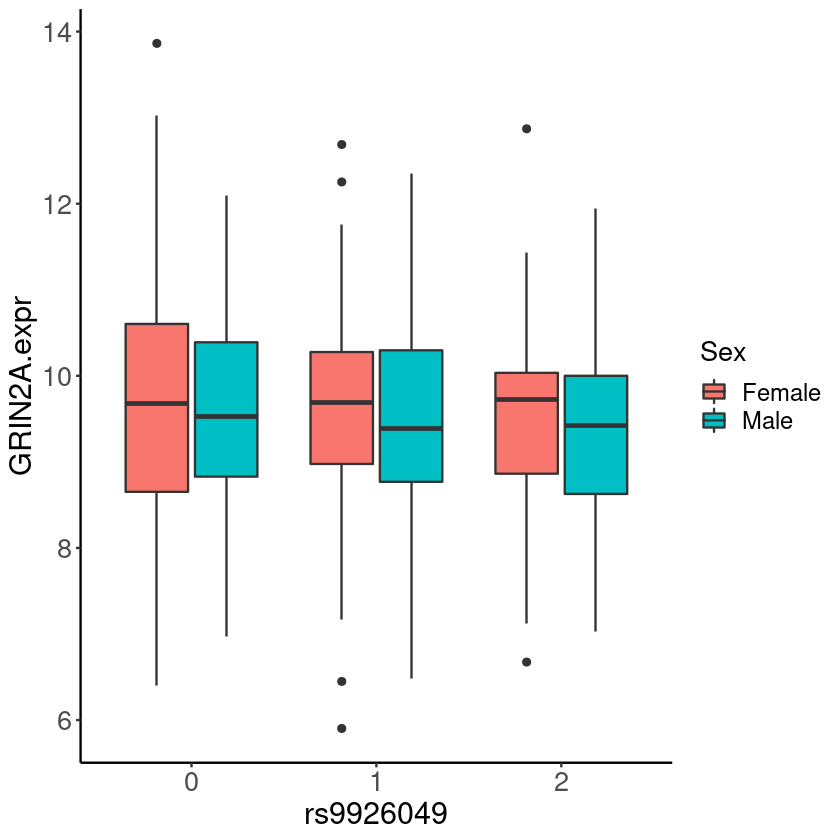

In [48]:
ggplot(df, aes(x = rs9926049, y = GRIN2A.expr, fill = Sex)) +
geom_boxplot() +
theme_classic() +
theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.text = element_text(size = 14),
          legend.title = element_text(size = 16))